<a href="https://colab.research.google.com/github/IZ001/Stat-Machine-Learning/blob/main/Project_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task2 

Look into the provided data set by e.g. plotting the individual features. Based on your analysis,
answer the following questions:

• Do men or women dominate speaking roles in Hollywood movies?
• Has gender balance in speaking roles changed over time (i.e. years)?
• Do flms in which men do more speaking make a lot more money than flms in which women
speak more?
Write 1-2 sentences for each question and support your fndings with evidence (statistics, plots, ...).
Based on your analysis, you should evaluate how the worst-case classifer for this problem is expected
to perform. That is, the classifer that always randomly picks a class or always predicts the same
output class.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

from google.colab import files
uploaded = files.upload()




Saving train.csv to train (4).csv


In [138]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']), na_values = '?').dropna().reset_index(drop=True)
# Dataset is now stored in a Pandas Dataframe

In [139]:
#data.head(20)

In [140]:
#data.info()

In [141]:
#data.describe(include="all")

In [142]:
#pd.plotting.scatter_matrix(data.iloc[:, :], figsize = (10, 10))
#plt.show()

In [143]:
# Compute a correlation matrix (pairwise correlations of features).
# = data.corr()
#cor

In [144]:
# One way to visualize a cor. mat. - a clustered heatmap.
# See here for more examples: https://seaborn.pydata.org/generated/seaborn.clustermap.html

# Install a package in the terminal if you don't have it. 
# E.g. on Windows use a Command Prompt. You need to have pip available.

# pip3 install seaborn
import seaborn as sns
#sns.clustermap(cor, annot=cor)

In [145]:
data['Lead'] = np.where(data['Lead'] == 'Female', 1, 0)

In [146]:
data.head(20)

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,1
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,0
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,0
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,0
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,0
5,1492,5872,1491.0,994,11,1997,4,2889,327.0,45.909091,36.500000,55.0,41.0,0
6,1500,5322,1191.0,287,6,1980,3,2631,269.0,47.000000,24.500000,61.0,25.0,0
7,349,6098,2692.0,2472,9,1988,2,3057,53.0,43.000000,31.000000,48.0,31.0,0
8,857,8851,4042.0,3476,13,2001,2,3952,89.0,47.416667,28.500000,33.0,27.0,0
9,2619,9626,1604.0,869,9,1973,6,5403,565.0,26.500000,22.000000,20.0,26.0,0


In [147]:
# Number of male(0) and female(1) Leads.  
print(data.groupby(['Lead']).size())
female_ratio = 254/1039
print(f'There were just {female_ratio*100:.1f} % women leads during the whole period')
print(f'Given classification problem is imbalanced. The classifer, which always predicts the same output class - Male, would give the error approx. 24.4 %.')


Lead
0    785
1    254
dtype: int64
There were just 24.4 % women leads during the whole period
Given classification problem is imbalanced. The classifer, which always predicts the same output class - Male, would give the error approx. 24.4 %.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

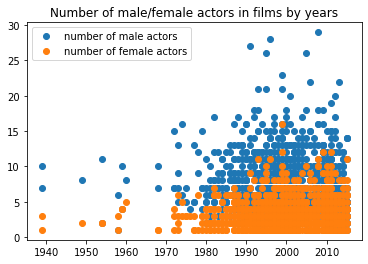

<function matplotlib.pyplot.show>

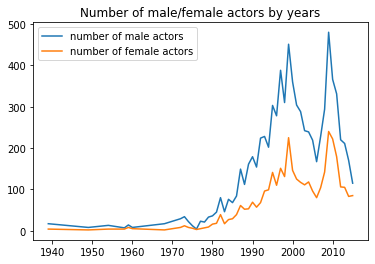

In [148]:
from numpy.core.multiarray import datetime_as_string
data_sum_by_year = data.groupby(by=["Year"], as_index=False).sum()
print(data.info())



fig, ax = plt.subplots()
ax.plot(data['Year'], data['Number of male actors'], 'o', label="number of male actors")
ax.plot(data['Year'], data['Number of female actors'], 'o', label="number of female actors")
ax.legend()
plt.title('Number of male/female actors in films by years')
plt.show()


plt.plot(data_sum_by_year['Year'], data_sum_by_year['Number of male actors'], label="number of male actors")
plt.plot(data_sum_by_year['Year'], data_sum_by_year['Number of female actors'], label="number of female actors")
plt.title('Number of male/female actors by years')
plt.legend()
plt.show



Text(0.5, 1.0, 'Female actors ratio by year')

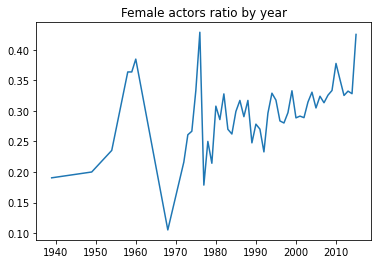

In [149]:
ratio_f = data_sum_by_year['Number of female actors']/(data_sum_by_year['Number of female actors'] + data_sum_by_year['Number of male actors'])
plt.plot(data_sum_by_year['Year'], ratio_f, label="ratio of female actors")
plt.title('Female actors ratio by year')


<function matplotlib.pyplot.show>

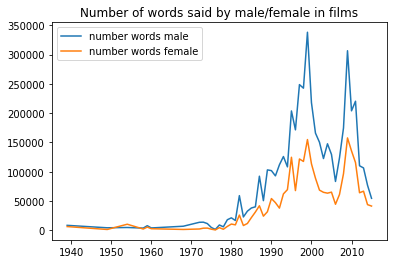

In [150]:
plt.plot(data_sum_by_year['Year'], data_sum_by_year['Number words male'], label="number words male")
plt.plot(data_sum_by_year['Year'], data_sum_by_year['Number words female'], label="number words female")
plt.title('Number of words said by male/female in films')
plt.legend()
plt.show


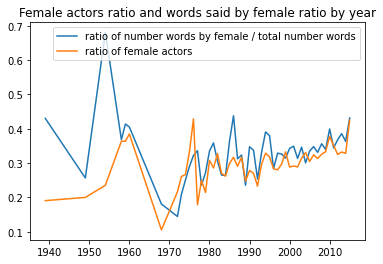

In [151]:
ratio_f2 = data_sum_by_year['Number words female']/(data_sum_by_year['Number words female'] + data_sum_by_year['Number words male'])
plt.plot(data_sum_by_year['Year'], ratio_f2, label="ratio of number words by female / total number words")


ratio_f = data_sum_by_year['Number of female actors']/(data_sum_by_year['Number of female actors'] + data_sum_by_year['Number of male actors'])
plt.plot(data_sum_by_year['Year'], ratio_f, label="ratio of female actors")
plt.title('Female actors ratio and words said by female ratio by year')
plt.legend()

In [152]:
data['number of words male with lead'] = np.where(data['Lead']==0, data['Number words male'] + data['Number of words lead'], data['Number words male'])
data['number of words female with lead'] = np.where(data['Lead']==1, data['Number words female'] + data['Number of words lead'], data['Number words female'])
data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead,number of words male with lead,number of words female with lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,1,2631.0,3763.0
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,0,7256.0,1524.0
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,0,4021.0,155.0
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,0,8782.0,1073.0
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,0,6371.0,1317.0


Do men or women dominate speaking roles in Hollywood movies?

Has gender balance in speaking roles changed over time (i.e. years)?

Do flms in which men do more speaking make a lot more money than flms in which women
speak more?

Text(0, 0.5, 'mean income from films')

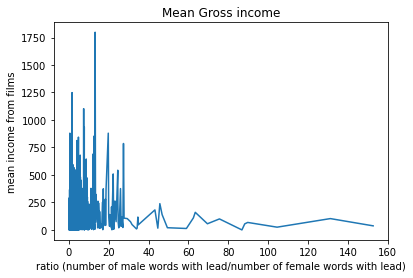

In [153]:
'''
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.plot( data['number of words female with lead'], data['Gross'],'o',label="female actors", color ='orange')
ax2.plot(data['number of words male with lead'], data['Gross'],'o', label="male actors")
fig.suptitle('Gross')
fig.legend()
plt.show
'''
'''

plt.plot(data['Gross'],data['number of words male with lead']/data['number of words female with lead'], 'o',label="number male words/number female words")
plt.title('Gross')

plt.show
'''
data['ratio'] = data['number of words male with lead']/data['number of words female with lead']


data_mean_by_ratio = data.groupby(by=["ratio"], as_index=False).mean()
plt.plot(data_mean_by_ratio['ratio'],data_mean_by_ratio['Gross'],label="number male words with lead/number female words with lead")
plt.title('Mean Gross income')
#plt.xlim([0,15])
plt.xlabel('ratio (number of male words with lead/number of female words with lead)')
plt.ylabel('mean income from films')
# On average the more male words in the film comparing to the number of women words, the less is gross income frome the film. 
#(The mean incomes from the films with different men/womn word ratios are presented here)
#Show with and without xlim

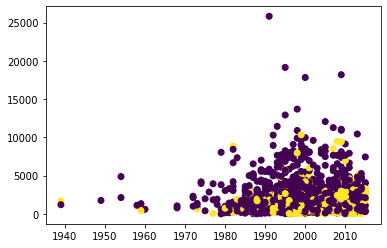

In [154]:
plt.scatter(data['Year'], data['Difference in words lead and co-lead'], c = data['Lead'])
#plt.xlim([1975,2020])



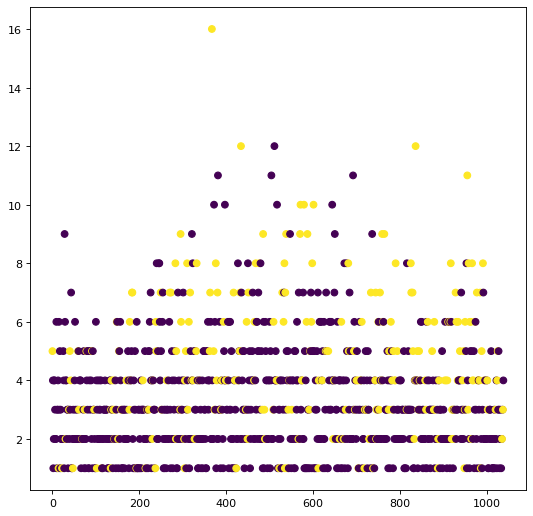

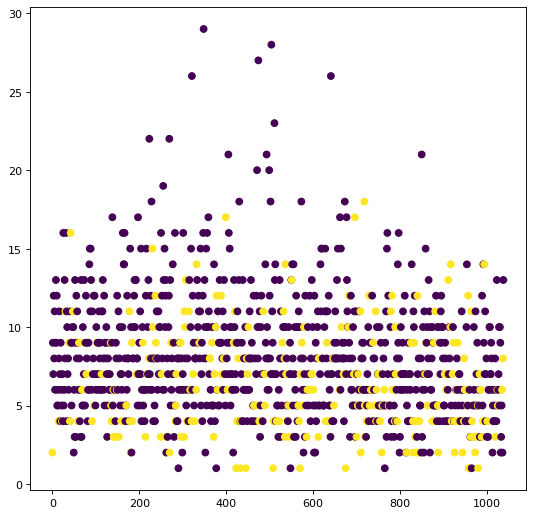

In [155]:
# number of female actors, lead

num = np.arange(0, 1039,1)

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(num,data['Number of female actors'], c = data['Lead'])
#plt.xlim([0,30])
plt.show()

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(num, data['Number of male actors'], c = data['Lead'])
plt.show()

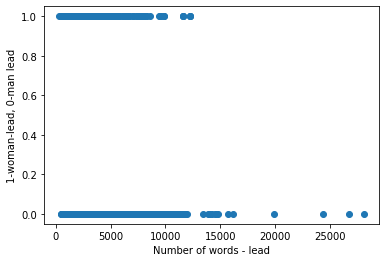

Text(0, 0.5, '1-woman-lead, 0-man lead')

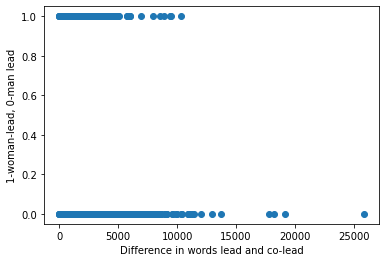

In [156]:
plt.plot(data['Number of words lead'], data['Lead'],'o')
plt.xlabel('Number of words - lead')
plt.ylabel('1-woman-lead, 0-man lead')
plt.show()

plt.plot(data['Difference in words lead and co-lead'], data['Lead'],'o')
plt.xlabel('Difference in words lead and co-lead')
plt.ylabel('1-woman-lead, 0-man lead')

In [157]:
data = data.drop(columns=['number of words male with lead', 'number of words female with lead', 'ratio'])


logistic regression

In [158]:
# Split the data randomly into a training set and a test set of approximately similar size.
#data['ratio'] = data['Number of male actors']/data['Number of female actors']
#data['year^3'] = data['Year']* data['Year']* data['Year']
#data['Number of fem act^2'] = data['Number of female actors']*data['Number of female actors']*data['Number of female actors']


np.random.seed(1)
trainI = np.random.choice(data.shape[0], size= 700, replace=False)
trainIndex = data.index.isin(trainI)

train = data.iloc[trainIndex]
test = data.iloc[~trainIndex]

In [159]:
#input_variables = ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female','Age Lead', 'Age Co-Lead', 'Number of fem act^2']

In [160]:
# with scaling

import itertools
def findsubsets(s, n):
    return list(itertools.combinations(s, n))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

min_error = data.shape[0]
error_a = 0
features_max = []
coef =0
conf_matrix =0
chosen_model =0
prob = 0

pc_auc = 0
roc_auc = 0
f1 = 0
roc_auc_a = 0
pc_auc_a = 0
pc_auc_max = 0
roc_auc_max = 0
f1_a = 0

s = {'Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female','Age Lead', 'Age Co-Lead'}
n = 13

# define model

#weights = {0:1.0, 1:3.0}
#model = skl_lm.LogisticRegression(solver ='lbfgs', class_weight=weights)
# liblinear, 'lbfgs'
model = skl_lm.LogisticRegression(solver ='liblinear',C = 0.04716237184469433, penalty = 'l1')

subsets = findsubsets(s, n)
for s in subsets:
  input_variables = list(s)
  #print(input_variables)
  #input_variables = ['Number of male actors', 'Gross', 'Mean Age Male', 'Age Lead', 'Number of words lead', 'Difference in words lead and co-lead', 'Year', 'Age Co-Lead', 'Number of female actors', 'Number words female']
  #[[-0.63744641  1.71961313 -2.05033302  0.02429466  0.58819222  1.43915913
  #-1.52387598  0.13443677  0.05252372 -0.25325762]]
  #input_variables = ['Number of male actors', 'Difference in words lead and co-lead', 'Number words female', 'Number of female actors', 'Age Co-Lead', 'Age Lead', 'Mean Age Male', 'Number of words lead']
  #[[-5.30473847e-02  8.50788826e-04 -1.05862478e-03 -1.38213617e-03
   #5.10226686e-02  7.60804437e-01 -8.04861665e-04 -2.01712390e-05
   #6.42714045e-03 -6.60983951e-05]]
  x_train = train[input_variables]
  y_train = train['Lead']

  x_test = test[input_variables]
  y_test = test['Lead']
  '''
  model.fit(x_train, y_train )
  predict_prob = model.predict_proba(x_test)

  '''
  import sklearn.preprocessing as skl_pre
  scaler = skl_pre.StandardScaler().fit(x_train)

  model.fit(scaler.transform(x_train), y_train )
  predict_prob = model.predict_proba(scaler.transform(x_test))
  
  #print(model.classes_)
  #print(predict_prob[0:5])
  prediction = np.where(predict_prob[:,1] > 0.5, 1, 0)
  

  #Misclassification error
  error = np.mean(prediction != y_test)

  # calculate roc auc
  roc_auc = roc_auc_score(y_test, predict_prob[:,1])

  # calculate the precision-recall auc
  precision, recall, _ = precision_recall_curve(y_test, predict_prob[:,1])
  pc_auc = auc(recall, precision)
  f1 = f1 = 2*precision*recall/(precision+recall)

  #if roc_auc > 0.885:
    #print(input_variables)

  # chose the model with the max ROC AUC
  if roc_auc > roc_auc_max:
    roc_auc_max = roc_auc
    error_a = error
    features_max = input_variables
    chosen_model = model
    conf_matrix = pd.crosstab(prediction, y_test)
    prob = predict_prob
    pc_auc_a = pc_auc
    f1_a = f1

'''
  # chose the model with the min classification error
  if min_error > error:
    min_error = error
    features_max = input_variables
    chosen_model = model
    conf_matrix = pd.crosstab(prediction, y_test)
    prob = predict_prob
    roc_auc_a = roc_auc
    pc_auc_a = pc_auc
    f1_a = f1
'''
#print(f1_a)
print(features_max)
print('Misclassification error',error_a)
print(f'ROC AUC = {roc_auc_max}')
print('PC AUC =', pc_auc_a)
print('F1 =', np.max(f1_a))
print(chosen_model.coef_)
print(chosen_model.classes_)
print(conf_matrix)
print(prob[:5])



['Number of male actors', 'Total words', 'Number of female actors', 'Number words female', 'Number words male', 'Age Lead', 'Mean Age Male', 'Age Co-Lead', 'Mean Age Female', 'Difference in words lead and co-lead', 'Gross', 'Number of words lead', 'Year']
Misclassification error 0.20648967551622419
ROC AUC = 0.845753350235422
PC AUC = 0.6755158645551024
F1 = 0.6382978723404255
[[-0.32140472  0.          0.62028476 -0.21837941  0.00519134 -0.31240439
   0.          0.30794797  0.         -0.2519404   0.          0.
   0.        ]]
[0 1]
Lead     0   1
row_0         
0      245  64
1        6  24
[[0.86105793 0.13894207]
 [0.92576042 0.07423958]
 [0.33872612 0.66127388]
 [0.82208624 0.17791376]
 [0.81014029 0.18985971]]


In [161]:
X = data
y = data['Lead']
print(X)
print(y)
#print(X['Lead']==y)
#a =np.where(X['Lead']!=y, 1,0)
#np.sum(a)

      Number words female  Total words  ...  Age Co-Lead  Lead
0                    1512         6394  ...         65.0     1
1                    1524         8780  ...         34.0     0
2                     155         4176  ...         37.0     0
3                    1073         9855  ...         23.0     0
4                    1317         7688  ...         39.0     0
...                   ...          ...  ...          ...   ...
1034                  303         2398  ...         24.0     0
1035                  632         8404  ...         34.0     1
1036                 1326         2750  ...         25.0     0
1037                  462         3994  ...         32.0     1
1038                 2735        11946  ...         48.0     0

[1039 rows x 14 columns]
0       1
1       0
2       0
3       0
4       0
       ..
1034    0
1035    1
1036    0
1037    1
1038    0
Name: Lead, Length: 1039, dtype: int64


In [162]:
import sklearn.model_selection as skl_ms
import sklearn.preprocessing as skl_pre
n_runs = 20
features_lsts_with_big_roc_auc =[]

s = {'Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female','Age Lead', 'Age Co-Lead'}

#def find_best_sets_of_input_variables(s, n):
#s - set with all variables, n -number of variables in subsets
subsets_1 = findsubsets(s, 8)
subsets_2 = findsubsets(s, 9)
subsets_3 = findsubsets(s, 10)

subsets = subsets_1 + subsets_2 + subsets_3
roc_auc_n = np.zeros((n_runs, len(subsets)))
pc_auc = 0
error = 0
pc_auc = 0
f1 = 0

for i in range(n_runs):
  X_train, X_val, y_train, y_val = skl_ms.train_test_split(X, y, test_size = 0.3)
  
  for j, s in enumerate(subsets):
    input_variables = list(s)
      
    model = skl_lm.LogisticRegression(solver ='liblinear')

    x_train = X_train[input_variables]

    x_test = X_val[input_variables]
    y_test = y_val

    scaler = skl_pre.StandardScaler().fit(x_train)

    model.fit(scaler.transform(x_train), y_train )
    predict_prob = model.predict_proba(scaler.transform(x_test))

    prediction = np.where(predict_prob[:,1] > 0.5, 1, 0)
    
    #Misclassification error
    #error = np.mean(prediction != y_test)

    # calculate roc auc
    roc_auc = roc_auc_score(y_test, predict_prob[:,1])
    roc_auc_n[i,j] = roc_auc

    # calculate the precision-recall auc
    #precision, recall, _ = precision_recall_curve(y_test, predict_prob[:,1])
    #pc_auc = auc(recall, precision)
    #f1 = f1 = 2*precision*recall/(precision+recall)

#print(roc_auc_n)

roc_auc_avg = np.mean(roc_auc_n, axis = 0)
#print(roc_auc_avg)
print(len(subsets))
print(np.max(roc_auc_avg)*(1-0.001))

for idx ,el in enumerate(roc_auc_avg):
  if el > np.max(roc_auc_avg)*(1-0.001):
    features_lsts_with_big_roc_auc.append(list(subsets[idx]))

for el in features_lsts_with_big_roc_auc:
  print(el)
'''
    if roc_auc > 0.885:
      features_lsts_with_big_roc_auc.append(input_variables)
'''

KeyboardInterrupt: ignored

In [ ]:
for el in features_lsts_with_big_roc_auc:
  print(len(el))

In [ ]:
# cross-validation of models

# find the decision threshold 
def find_r(prob, y_test):
  recall = []
  precision = []
  f1_max = 0
  r_f1 = 0

  positive_class = 1
  negative_class = 0

  P = np.sum(y_test == positive_class)
  prediction = np.empty(len(x_test), dtype ='object')
  tr_val = np.linspace(0.00 , 1, num =101)

  for r in tr_val:
    prediction = np.where(prob[:,1] > r, positive_class, negative_class)
    P_star = np.sum(prediction == positive_class)
    tr_pos = np.sum((prediction == y_test)&(prediction == positive_class))

    rec = tr_pos/P
    prec = tr_pos/P_star
    
    f1 = 2*prec*rec/(prec+rec)
    if f1_max < f1:
      f1_max =f1
      r_f1 = r
    
  return r_f1

# cross-validation of r
#import sklearn.model_selection as skl_ms
#features =['Number of male actors', 'Gross', 'Mean Age Male', 'Age Lead', 'Number of words lead', 'Difference in words lead and co-lead', 'Year', 'Age Co-Lead', 'Number of female actors', 'Number words female', 'Total words', 'Mean Age Female', 'Number words male']

def calculate_average_r(features, X, y):
  n_runs = 10

  tr_rates_n = np.zeros((n_runs))

  #X = data.drop(columns = 'Lead')
  #y = data['Lead']

  for i in range(n_runs):

    X_train, X_val, y_train, y_val = skl_ms.train_test_split(X, y, test_size = 0.3)

    model = skl_lm.LogisticRegression(solver ='liblinear')

    scaler = skl_pre.StandardScaler().fit(X_train[features])
    model.fit(scaler.transform(X_train[features]), y_train)
    predict_prob = model.predict_proba(scaler.transform(X_val[features]))
    
    tr_rates_n[i] = find_r(predict_prob, y_val)

  return np.average(tr_rates_n)

In [ ]:
'''
# cross-validation of models

#import sklearn.model_selection as skl_ms
features_list = features_lsts_with_big_roc_auc

#features_list = [['Number of male actors', 'Gross', 'Mean Age Male', 'Age Lead', 'Number of words lead', 'Difference in words lead and co-lead', 'Year', 'Age Co-Lead', 'Number of female actors', 'Number words female', 'Total words', 'Mean Age Female', 'Number words male']]

n_runs = 10

pc_auc_n =np.zeros((n_runs, len(features_list)))
roc_auc_n = np.zeros((n_runs, len(features_list)))
misclassification_n = np.zeros((n_runs, len(features_list)))
tr_rate_models = []

X = data.drop(columns = 'Lead')
y = data['Lead']

for i in range(n_runs):

  X_train, X_val, y_train, y_val = skl_ms.train_test_split(X, y, test_size = 0.3)

  for j,features in enumerate(features_list):

    model = skl_lm.LogisticRegression(solver ='lbfgs')

    scaler = skl_pre.StandardScaler().fit(X_train[features])
    model.fit(scaler.transform(X_train[features]), y_train)
    predict_prob = model.predict_proba(scaler.transform(X_val[features]))
    # calculate the metrics
    precision, recall, _ = precision_recall_curve(y_val, predict_prob[:,1])

    pc_auc_n[i,j] = auc(recall, precision)
    roc_auc_n[i,j] = roc_auc_score(y_val, predict_prob[:,1])  

    tr_rate = calculate_average_r(features, X, y)
    prediction = np.where(predict_prob[:,1] > tr_rate, 1, 0)
    misclassification_n[i,j] = (np.mean(prediction != y_val))

    tr_rate_models.append(tr_rate)

plt.boxplot(pc_auc_n)
plt.title('cross validation for different feature combinations')
plt.xticks(np.arange(len(features_list))+1)
plt.ylabel('pc_auc')
plt.show()

plt.boxplot(roc_auc_n)
plt.title('cross validation for different feature combinations')
plt.xticks(np.arange(len(features_list))+1)
plt.ylabel('roc_auc')
plt.show()

plt.boxplot(misclassification_n)
plt.title('cross validation for different feature combinations')
plt.xticks(np.arange(len(features_list))+1)
plt.ylabel('misclassification error')
plt.show()

'''
  

In [ ]:
# cross-validation of models with k-fold 

#import sklearn.model_selection as skl_ms
features_list = features_lsts_with_big_roc_auc

#features_list = [['Number of male actors', 'Gross', 'Mean Age Male', 'Age Lead', 'Number of words lead', 'Difference in words lead and co-lead', 'Year', 'Age Co-Lead', 'Number of female actors', 'Number words female', 'Total words', 'Mean Age Female', 'Number words male']]

n_runs = 10

pc_auc_n =np.zeros((n_runs, len(features_list)))
roc_auc_n = np.zeros((n_runs, len(features_list)))
misclassification_n = np.zeros((n_runs, len(features_list)))
tr_rate_models = []

X = data.drop(columns = 'Lead')
y = data['Lead']

n_fold = 10
cv = skl_ms.KFold(n_splits = n_fold, random_state = 1, shuffle = True)

for i, (train_index, val_index) in enumerate(cv.split(X)):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]
#for i in range(n_runs):

  #X_train, X_val, y_train, y_val = skl_ms.train_test_split(X, y, test_size = 0.3)

  for j,features in enumerate(features_list):

    model = skl_lm.LogisticRegression(solver ='liblinear')

    scaler = skl_pre.StandardScaler().fit(X_train[features])
    model.fit(scaler.transform(X_train[features]), y_train)
    predict_prob = model.predict_proba(scaler.transform(X_val[features]))
    # calculate the metrics
    precision, recall, _ = precision_recall_curve(y_val, predict_prob[:,1])

    pc_auc_n[i,j] = auc(recall, precision)
    roc_auc_n[i,j] = roc_auc_score(y_val, predict_prob[:,1])  

    tr_rate = calculate_average_r(features, X, y)
    prediction = np.where(predict_prob[:,1] > tr_rate, 1, 0)
    misclassification_n[i,j] = (np.mean(prediction != y_val))

    tr_rate_models.append(tr_rate)

plt.subplot(1, 3, 1)
plt.boxplot(pc_auc_n)
plt.title('cross validation for different feature combinations')
plt.xticks(np.arange(len(features_list))+1)
plt.ylabel('pc_auc')
plt.show()

plt.subplot(1, 3, 2)
plt.boxplot(roc_auc_n)
plt.title('cross validation for different feature combinations')
plt.xticks(np.arange(len(features_list))+1)
plt.ylabel('roc_auc')
plt.show()

plt.subplot(1, 3, 3)
plt.boxplot(misclassification_n)
plt.title('cross validation for different feature combinations')
plt.xticks(np.arange(len(features_list))+1)
plt.ylabel('misclassification error')
plt.show()


In [ ]:
print('tr_rates', tr_rate_models)

In [ ]:
# random search logistic regression model 
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

def validate_model(X,y):

  # define model
  model = LogisticRegression()
  # define evaluation
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define search space
  space = dict()
  #space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
  space['solver'] = ['liblinear']
  space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
  space['C'] = loguniform(1e-5, 100)
  # define search
  search = RandomizedSearchCV(model, space, n_iter=500, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1)

  # execute search
  result = search.fit(X, y)
  # summarize result
  print('Best Score: %s' % result.best_score_)
  print('Best Hyperparameters: %s' % result.best_params_)
  return result.best_params_

# insert input variables(list of features) to validate the model
features = ['Year', 'Number of female actors', 'Number of words lead', 'Total words', 'Age Lead', 'Number words female', 'Difference in words lead and co-lead', 'Mean Age Male', 'Age Co-Lead', 'Number of male actors']
validate_model(X[features], y)

In [ ]:
'''
#ROC With scaling

# True positive rate = TP/P = TP/(TP + FN)
# False pos rate = FP /N = FP/(FP + TN)
print(prob[:5])

true_positive_rate = []
false_positive_rate = []

x_test = test[features_max]
y_test = test['Lead']

positive_class = 1
negative_class = 0

P = np.sum(y_test == positive_class)
N = np.sum(y_test == negative_class)

#x_train = train[features_max]
#y_train = train['Lead']
#scaler = skl_pre.StandardScaler().fit(x_train)
#model = skl_lm.LogisticRegression(solver ='lbfgs')
#model.fit(scaler.transform(x_train), y_train )
#predict_prob = model.predict_proba(scaler.transform(x_test))

#predict_prob = chosen_model.predict_proba(scaler.transform(x_test))
#print(predict_prob)

prediction = np.empty(len(x_test), dtype ='object')

tr_val = np.linspace(0.00 , 1, num =101)

for k in tr_val:
  prediction = np.where(prob[:,1] > k, positive_class, negative_class)
  
  tr_pos = np.sum((prediction == y_test)&(prediction == positive_class))
  
  fal_pos = np.sum((prediction != y_test)&(prediction == positive_class))
  true_positive_rate.append(tr_pos/P)
  false_positive_rate.append(fal_pos/N)

print(false_positive_rate)
print(true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate)
for idx in [0, 1, 10, 20, 30,40, 50, 98, 100]:
  plt.text(false_positive_rate[idx], true_positive_rate[idx], f'r={tr_val[idx]:.2f}')

plt.ylim([0, 1.1])
plt.xlim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
'''

In [ ]:
'''
#The precision -recall curve With scaling

# recall = True positive rate = TP/P = TP/(TP + FN)
# precision = TP / P*    (P* = FP + TP)

def find_r(prob, y_test):
  recall = []
  precision = []

  #x_test = test[features_max]
  y_test = test['Lead']

  positive_class = 1
  negative_class = 0

  P = np.sum(y_test == positive_class)

  prediction = np.empty(len(x_test), dtype ='object')

  tr_val = np.linspace(0.00 , 1, num =101)
  f1_max = 0
  k_f1 = 0

  for k in tr_val:
    prediction = np.where(prob[:,1] > k, positive_class, negative_class)
    P_star = np.sum(prediction == positive_class)
    tr_pos = np.sum((prediction == y_test)&(prediction == positive_class))

    rec = tr_pos/P
    prec = tr_pos/P_star
    
    f1 = 2*prec*rec/(prec+rec)
    if f1_max < f1:
      f1_max =f1
      k_f1 = k
    
    recall.append(tr_pos/P)
    precision.append(tr_pos/P_star)

  return k_f1

plt.plot(recall, precision)
for idx in [0, 1, 10, 20, 30,40, 50, 98, 100]:
  plt.text(recall[idx], precision[idx], f'r={tr_val[idx]:.2f}')

plt.ylim([0, 1.1])
plt.xlim([0,1])
plt.xlabel('Recall')
plt.ylabel('Precision')

'''